In [ ]:
# CIFAR10 dataset
# input: 3x32x32 airplane
# output:   airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck - 10 labels

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

In [2]:
# transform.ToTensor  - converts np.ndarray (H,W,C) [0,255] -> torch.FloatTensor (C, H, W) [0.0,1.0]
# transform.Normalize - normalize a tensor with given mean and standard deviation for each channel (M1,...,Mn), (S1,..,Sn)
# input[channel] = (input[channel] - mean[channel]) / std[channel]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

# if dataset downloaded into ./data -> set downlaod=False
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [3]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

torch.Size([4, 3, 32, 32])


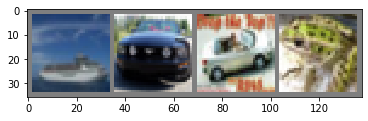

tensor([8, 1, 1, 6])
['ship', 'car', 'car', 'frog']


In [4]:
# visualize all images in batch
# (batch_size, C, H, W)
print(images.shape)
def show_image(image):
    image = image / 2 + 0.5
    image = np.transpose(image.numpy(), (1, 2, 0))
    plt.imshow(image)
    plt.show()

im = torchvision.utils.make_grid(images)
show_image(im)
    
print(labels)
print([classes[c] for c in labels])

In [5]:
import torch.nn as nn
import torch.nn.functional as F

# nn.Conv2d(C_in, C_out, kernel_size)  (N, C_in, H, W) -> (N, C_out, H_out, W_out)

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = CNN()

In [6]:
print(model)

CNN(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [7]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Printing all tensors that need to be trained
for p in model.parameters():
    print(p.requires_grad, p.name, p.data.shape, p.data.grad)

True None torch.Size([6, 3, 5, 5]) None
True None torch.Size([6]) None
True None torch.Size([16, 6, 5, 5]) None
True None torch.Size([16]) None
True None torch.Size([120, 400]) None
True None torch.Size([120]) None
True None torch.Size([84, 120]) None
True None torch.Size([84]) None
True None torch.Size([10, 84]) None
True None torch.Size([10]) None


In [8]:
# training model
EPOCHS = 2

for epoch in range(EPOCHS):
    
    total_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        output = model.forward(inputs)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
    
        total_loss += loss.item()
        if (i + 1) % 1000 == 0:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, total_loss /  1000))
            total_loss = 0.0
        
print('Finished training')

[1,  1000] loss: 2.289
[1,  2000] loss: 2.117
[1,  3000] loss: 1.940
[1,  4000] loss: 1.804
[1,  5000] loss: 1.693
[1,  6000] loss: 1.689
[1,  7000] loss: 1.602
[1,  8000] loss: 1.608
[1,  9000] loss: 1.543
[1, 10000] loss: 1.517
[1, 11000] loss: 1.516
[1, 12000] loss: 1.467
[2,  1000] loss: 1.381
[2,  2000] loss: 1.394
[2,  3000] loss: 1.363
[2,  4000] loss: 1.399
[2,  5000] loss: 1.373
[2,  6000] loss: 1.340
[2,  7000] loss: 1.328
[2,  8000] loss: 1.348
[2,  9000] loss: 1.328
[2, 10000] loss: 1.314
[2, 11000] loss: 1.315
[2, 12000] loss: 1.292
Finished training


In [9]:
# save model to file
torch.save(model.state_dict(), "./models/CNN.pth")

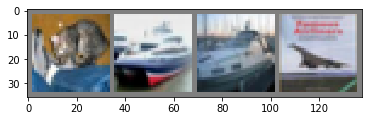

tensor([3, 8, 8, 0])
['cat', 'ship', 'ship', 'plane']


In [11]:
# test model
dataiter = iter(testloader)
images, labels = dataiter.next()

im = torchvision.utils.make_grid(images)
show_image(im)
    
print(labels)
print([classes[c] for c in labels])

In [37]:
# try one input
outputs = model.forward(images)
_, predicted = torch.max(outputs, 1)
print([classes[c] for c in predicted])

['ship', 'ship', 'car', 'plane']


In [38]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model.forward(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the model: %d' % (100 * correct / total))

Accuracy of the model: 56
